In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from scipy import stats

from sklearn.preprocessing import StandardScaler

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "unsupervised_learning"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
users = pd.read_excel("data-ml-project/data/mobile_app_user_dataset_1.xlsx")
users.head()

/opt/anaconda3/lib/python3.10/site-packages/openpyxl/worksheet/_read_only.py:85: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10
0,Unique ID for each participant,StartDate,EndDate,"0=incomplete response, 1=complete response, 2=...","1=ours, 2=panel",Browser Meta Info-Browser,Browser Meta Info-Version,Browser Meta Info-Operating System,Browser Meta Info-Screen Resolution,Browser Meta Info-Flash Version,...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...,Your personality may influence the types of ap...
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,6,3,7,2,6,3,4,3,4,4
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,4,4,5,2,3,3,5,3,5,3
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,4,3,6,3,5,5,5,2,5,3


In [7]:
users.shape

(10209, 161)

In [9]:
users.describe()

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10
count,10209,10209,10209,10209,10209,10040,10036,10040,10040,10040,...,5277,5277,5277,5277,5277,5277,5277,5277,5277,5277
unique,10209,9903,9961,7,3,9,202,150,297,116,...,8,8,8,8,8,8,8,8,8,8
top,Unique ID for each participant,2012-10-23 10:04:59,2012-10-23 12:12:40,1,2,MSIE,9,Windows NT 6.1,1366x768,11.4.402.287,...,4,4,6,4,6,4,6,2,6,2
freq,1,3,3,4824,9818,4302,2396,4904,2027,2739,...,1239,1230,1584,1147,1410,1228,1631,1466,1381,1192


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10209 entries, 0 to 10208
Columns: 161 entries, ID to Q30_10
dtypes: object(161)
memory usage: 12.5+ MB


In [13]:
users.dtypes

ID                  object
StartDate           object
EndDate             object
Response Status     object
Participant Type    object
                     ...  
Q30_6               object
Q30_7               object
Q30_8               object
Q30_9               object
Q30_10              object
Length: 161, dtype: object

In [ ]:
# Display All
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [15]:
users = users.drop(index=0)

In [17]:
users.head(5)

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_1,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,6,3,7,2,6,3,4,3,4,4
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,4,4,5,2,3,3,5,3,5,3
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,4,3,6,3,5,5,5,2,5,3
5,5,2012-09-27 04:16:04,2012-09-27 04:24:56,1,1,Chrome,22.0.1229.79,Intel Mac OS X 10_7_4,1280x800,11.4.402,...,2,6,4,3,6,5,7,3,5,3


In [19]:
print(users['Q3_1_TEXT'].isnull().sum())

2310


In [21]:
users['Q3_1_TEXT'].astype(str).replace(to_replace=["nan", "None"], value=(0))
users['Q3_1_TEXT'].head(20)

1               NaN
2        Apple Inc.
3              iPad
4           Samsung
5             apple
6           I phone
7             Apple
8     Sony Ericsson
9             Apple
10            docmo
11              HTC
12          Samsung
13    Sony Ericsson
14              NaN
15              NaN
16          Samsung
17           iPhone
18    Sony Ericsson
19            Apple
20              HTC
Name: Q3_1_TEXT, dtype: object

In [23]:
users['Q3_1_TEXT'] = users['Q3_1_TEXT'].str.lower()

In [25]:
brand_mapped = np.array([
    np.nan, 'apple inc.', 'ipad', 'samsung', 'apple', 'i phone', 'sony ericsson', 
    'docmo', 'htc', 'iphone', 'nokia', 'blackberry', 'lg', 'alcatel', 'sony', 
    'zte', 'sony-ericsson', 'huawei', 'nokia 1100', 'android', 'motorola', 'rim', 
    'sumsung', 'nec', 'pantech', '京セラ', '富士通', 'sonyericsson', 'htc, asus', 
    'サムスン', 'moto', 'sumsang', 'zenithink', 'asus', 'appel', 'самсунг', 
    '三星', 'blacberry', 'нокия', '苹果', 'open mobile', 'samsung/google', 'e71', 
    'montecarlo', 'моторола', '诺基亚', 'porches design', '酷派', 'sansung', 
    'sony ericson', 'apple iphone', 'telstra', 'acer', 'samsumg', 'iphon', 'htf', 
    'eze-key', 'docomo', 'tim', 'acme', 'au', 'パナソニック', 'ソフトバンク', 
    'nvsbl', 'toshiba', 'sharp', 'black berry', '東芝', 'venko', 'sony erikson', 
    'ドコモ', 'ntt', '삼성', 'アップル', 'シャープ', 'nttドコモ', '애플', 'キョウセラ', 
    '分からない', 'chaina', 'サムソン', 'nokia celular', 'siemens', 'hp', 'ぱなそにっく', 
    '摩托罗拉', 'カシオ', 'самсунг, нокия', 'vodaphone, apple, android', 'unbekannt',
])


ios_keywords = ['apple', 'iphone', 'ipad', 'ipod', 'mac']
android_keywords = ['android', '三星', 'sansung', 'samsumg', 'sumsung', '삼성', 'samung',
                    'samsang' 'самсунг','huawei', '华为' 'htc', 'lg', 'sony', 'sony ericson', 
                    'ソニー', 'zte', '中兴','シャープ', '京セラ', 'キョウセラ', 'kyocera', '京セラ', 'キョウセラ', 
                    'fujitsu', '富士通', 'nec', 'necカシオ', 'panasonic', 'パナソニック', 'pantech', 'パンテック', 
                    'xiaomi', '小米', 'lenovo', '联想', 'sky', '스카이', 'coolpad', '酷派', 'sagem', 
                    'alcatel', 'micromax', 'asus', 'acer', 'casio', 'カシオ', 'docomo', 'ドコモ', 'sanyo', 'fly'
                    'motorola']

def categorize_entry(entry):
    if pd.isna(entry):
        return 'Other'
    entry = str(entry).lower().strip()  
    if any(keyword in entry for keyword in ios_keywords):
        return 'iOS'
    elif any(keyword in entry for keyword in android_keywords):
        return 'Android'
    else:
        return 'Other'

# Apply to the column
users['Q3_1_TEXT_standardized'] = users['Q3_1_TEXT'].apply(categorize_entry)

# Check the result
print(users[['Q3_1_TEXT', 'Q3_1_TEXT_standardized']].head())

    Q3_1_TEXT Q3_1_TEXT_standardized
1         NaN                  Other
2  apple inc.                    iOS
3        ipad                    iOS
4     samsung                  Other
5       apple                    iOS


In [27]:
users.head()

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_2,Q30_3,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10,Q3_1_TEXT_standardized
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,3,7,2,6,3,4,3,4,4,iOS
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,4,5,2,3,3,5,3,5,3,iOS
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,3,6,3,5,5,5,2,5,3,Other
5,5,2012-09-27 04:16:04,2012-09-27 04:24:56,1,1,Chrome,22.0.1229.79,Intel Mac OS X 10_7_4,1280x800,11.4.402,...,6,4,3,6,5,7,3,5,3,iOS


In [29]:
users['Q3_1_TEXT_standardized'].value_counts()

Q3_1_TEXT_standardized
Other      7341
Android    1910
iOS         957
Name: count, dtype: int64

In [31]:
users = pd.get_dummies(users, columns=['Q3_1_TEXT_standardized'])
users.head()

,ID,StartDate,EndDate,Response Status,Participant Type,Q1_1_TEXT,Q1_2_TEXT,Q1_3_TEXT,Q1_4_TEXT,Q1_5_TEXT,...,Q30_4,Q30_5,Q30_6,Q30_7,Q30_8,Q30_9,Q30_10,Q3_1_TEXT_standardized_Android,Q3_1_TEXT_standardized_Other,Q3_1_TEXT_standardized_iOS
1,1,2012-09-26 07:46:07,2012-09-26 07:46:21,2,1,Chrome,21.0.1180.89,WOW64,1280x800,11.3.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
2,2,2012-09-26 07:45:19,2012-09-26 07:56:41,1,1,Safari iPhone,6,CPU iPhone OS 6_0 like Mac OS X,320x480,-1,...,2,6,3,4,3,4,4,False,False,True
3,3,2012-09-26 07:45:35,2012-09-26 08:01:56,1,1,Safari,6,CPU OS 6_0 like Mac OS X,768x1024,-1,...,2,3,3,5,3,5,3,False,False,True
4,4,2012-09-26 16:58:29,2012-09-26 17:05:50,1,1,Firefox,15.0.1,Intel Mac OS X 10.6,1920x1200,11.4.402,...,3,5,5,5,2,5,3,False,True,False
5,5,2012-09-27 04:16:04,2012-09-27 04:24:56,1,1,Chrome,22.0.1229.79,Intel Mac OS X 10_7_4,1280x800,11.4.402,...,3,6,5,7,3,5,3,False,False,True


In [33]:
behavior_columns = [
    "Q4",  #Q4: Which app store do you use?
    "Q5",  # How frequently do you visit the app store to look for apps?
    "Q6",  # On average, how many apps do you download a month?
    "Q7_1", # When do you look for apps?
    "Q7_2",
    "Q7_3",
    "Q7_4", 
    "Q7_5", 
    #"Q7_6", other
    "Q8_1",  # How do you find apps?
    "Q8_2",
    "Q8_3",
    "Q8_4", 
    "Q8_5", 
    "Q8_7",
    "Q8_8", 
    "Q8_9", 
    #"Q8_10", other
    "Q9_1",  # What do you consider when choosing apps to download?
    "Q9_2",
    "Q9_3",
    "Q9_4", 
    "Q9_5", 
    "Q9_7",
    "Q9_8", 
    "Q9_9", 
    "Q9_10",
    "Q9_11",
    "Q9_12",
    #"Q9_13", other
    "Q10_1",  # Why do you download an app?
    "Q10_2",
    "Q10_3",
    "Q10_4", 
    "Q10_5", 
    "Q10_7",
    "Q10_8", 
    "Q10_9", 
    "Q10_10",
    "Q10_11",
    "Q10_12",
    "Q10_13",
    "Q10_14",
    #"Q10_15", other
    "Q14_1",  # What makes you stop using an app?
    "Q14_2",
    "Q14_3",
    "Q14_4", 
    "Q14_5", 
    "Q14_7",
    "Q14_8", 
    "Q14_9", 
    "Q14_10",
    "Q14_11",
    "Q14_12",
    "Q14_13",
    #"Q14_14", other
    "Q14_15",
    "Q15_1",  # Which type of apps do you download?
    "Q15_2",
    "Q15_3",
    "Q15_4", 
    "Q15_5", 
    "Q15_7",
    "Q15_8", 
    "Q15_9", 
    "Q15_10",
    "Q15_11",
    "Q15_12",
    "Q15_13",
    "Q15_14",
    "Q15_15",
    "Q15_16",
    "Q15_17",
    "Q15_18",
    "Q15_19",
    "Q15_20",
    "Q15_21",
    "Q15_22",
    #"Q15_23",
]
"""
Q4
Which app store do you use? - 1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, 
4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace,
7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps
Q5
How frequently do you visit the app store to look for apps? - 1=Never, 2=Less than once a month, 3=Once a month,
4=More than once a month, 5=Once a week, 6=More than once a week, 7=Once a day, 8=Several times a day, 
9=Other (please specify)
Q6
On average, how many apps do you download a month?
- 1=[0 - 1], 2=[2 - 5], 3=[6 - 10], 4=[11 - 20], 5=[21 - 30], 6=[More than 30]

"""

"\nQ4\nWhich app store do you use? - 1=Apple iOS App Store, 2=Blackberry App World, 3=Google Play / Android Market, \n4=Nokia Ovi Store, 5=Samsung Application Store, 6=Windows Phone Marketplace,\n7=None - my mobile device cannot run apps, 8=I don't know, 9=Other (please specify), 10=I don’t use apps\nQ5\nHow frequently do you visit the app store to look for apps? - 1=Never, 2=Less than once a month, 3=Once a month,\n4=More than once a month, 5=Once a week, 6=More than once a week, 7=Once a day, 8=Several times a day, \n9=Other (please specify)\nQ6\nOn average, how many apps do you download a month?\n- 1=[0 - 1], 2=[2 - 5], 3=[6 - 10], 4=[11 - 20], 5=[21 - 30], 6=[More than 30]\n\n"

In [35]:
users[behavior_columns].dtypes

Q4        object
Q5        object
Q6        object
Q7_1      object
Q7_2      object
           ...  
Q15_18    object
Q15_19    object
Q15_20    object
Q15_21    object
Q15_22    object
Length: 74, dtype: object

In [37]:
null_counts = users[behavior_columns].isnull().sum()
print(null_counts[null_counts > 0])

Q4        2310
Q5        4121
Q6        4121
Q7_1      9903
Q7_2      7959
          ... 
Q15_18    9326
Q15_19    8182
Q15_20    8263
Q15_21    9248
Q15_22    8150
Length: 74, dtype: int64


In [39]:
users['Q4'].head(25)

1     NaN
2       1
3       1
4       3
5       1
6       1
7       1
8       3
9       1
10      7
11      3
12      7
13      9
14    NaN
15    NaN
16      3
17      1
18      3
19      1
20      3
21      3
22      4
23      3
24    NaN
25      3
Name: Q4, dtype: object

In [41]:
users[behavior_columns] = users[behavior_columns].fillna(0)

/var/folders/l3/04463r3x53g06h8d9qdk69400000gn/T/ipykernel_96441/4218603422.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  users[behavior_columns] = users[behavior_columns].fillna(0)


In [43]:
print(users[behavior_columns].isnull().sum())

Q4        0
Q5        0
Q6        0
Q7_1      0
Q7_2      0
         ..
Q15_18    0
Q15_19    0
Q15_20    0
Q15_21    0
Q15_22    0
Length: 74, dtype: int64


In [45]:
users['Q4'].head(20)

1     0
2     1
3     1
4     3
5     1
6     1
7     1
8     3
9     1
10    7
11    3
12    7
13    9
14    0
15    0
16    3
17    1
18    3
19    1
20    3
Name: Q4, dtype: int64

In [47]:
users['Q4'].value_counts()

Q4
0     2310
3     2066
7     1653
1     1169
4      830
8      737
5      722
2      333
6      162
9      150
10      76
Name: count, dtype: int64

In [49]:
users[behavior_columns].dtypes

Q4        int64
Q5        int64
Q6        int64
Q7_1      int64
Q7_2      int64
          ...  
Q15_18    int64
Q15_19    int64
Q15_20    int64
Q15_21    int64
Q15_22    int64
Length: 74, dtype: object

In [51]:
target_col = [
    "Q3_1_TEXT_standardized_Android", "Q3_1_TEXT_standardized_Other", "Q3_1_TEXT_standardized_iOS",
    "Q4", "Q5", "Q6", "Q7_1", "Q7_2", "Q7_3", "Q7_4", "Q7_5", "Q8_1", "Q8_2",
    "Q8_3", "Q8_4", "Q8_5", "Q8_7", "Q8_8", "Q8_9", "Q9_1", "Q9_2", "Q9_3", 
    "Q9_4", "Q9_5", "Q9_7", "Q9_8", "Q9_9", "Q9_10", "Q9_11", "Q9_12", "Q10_1",
    "Q10_2", "Q10_3", "Q10_4", "Q10_5", "Q10_7", "Q10_8", "Q10_9", "Q10_10", 
    "Q10_11", "Q10_12", "Q10_13", "Q10_14", "Q14_1", "Q14_2", "Q14_3", "Q14_4", 
    "Q14_5", "Q14_7", "Q14_8", "Q14_9", "Q14_10", "Q14_11", "Q14_12", "Q14_13",
    "Q14_15", "Q15_1", "Q15_2", "Q15_3", "Q15_4", "Q15_5", "Q15_7", "Q15_8", 
    "Q15_9", "Q15_10", "Q15_11", "Q15_12", "Q15_13", "Q15_14", "Q15_15", "Q15_16",
    "Q15_17", "Q15_18", "Q15_19", "Q15_20", "Q15_21", "Q15_22"
]

In [53]:
users[target_col].dtypes

Q3_1_TEXT_standardized_Android     bool
Q3_1_TEXT_standardized_Other       bool
Q3_1_TEXT_standardized_iOS         bool
Q4                                int64
Q5                                int64
                                  ...  
Q15_18                            int64
Q15_19                            int64
Q15_20                            int64
Q15_21                            int64
Q15_22                            int64
Length: 77, dtype: object

In [56]:
data_for_clustering = users[target_col]

data_for_clustering = data_for_clustering.fillna(0) # double check for missing values 

scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_for_clustering)

In [73]:
# from sklearn.neighbors import NearestNeighbors

# # Nearest neighbors to find eps
# neighbors = NearestNeighbors(n_neighbors=5)
# neighbors_fit = neighbors.fit(X_scaled)
# distances, indices = neighbors_fit.kneighbors(X_scaled)

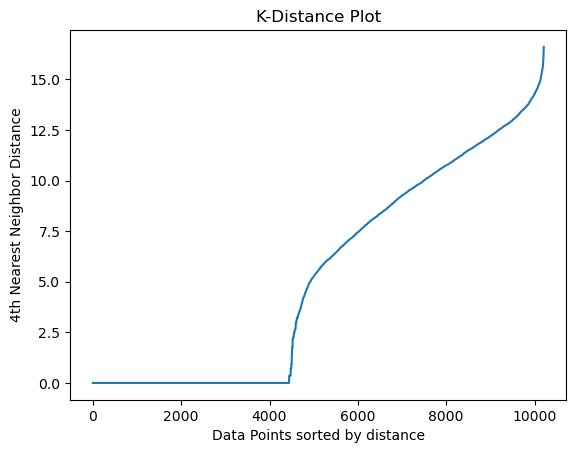

In [75]:
# distances = np.sort(distances[:, 4])  # 4th nearest neighbor
# plt.plot(distances)
# plt.title('K-Distance Plot')
# plt.xlabel('Data Points sorted by distance')
# plt.ylabel('4th Nearest Neighbor Distance')
# plt.show()

In [59]:
import seaborn as sns
from sklearn.decomposition import PCA

# # Step 1: Reduce to 2D using PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X_scaled)  # Perform PCA on the scaled data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [61]:
from sklearn.mixture import GaussianMixture

In [63]:
gm = GaussianMixture(n_components=4, n_init=10, random_state=42) #covariance_type="tied")
gm.fit(X_pca)

GaussianMixture(n_components=4, n_init=10, random_state=42)

In [65]:
gm.weights_ #proportions of clusters in percentage

array([0.40223635, 0.08420446, 0.28625321, 0.22730598])

In [67]:
gm.means_

array([[-3.77339282,  0.3616745 ],
       [ 8.81920337,  2.22532586],
       [ 3.7446272 , -0.95894975],
       [-1.30542993, -0.25674004]])

In [69]:
gm.covariances_

array([[[ 1.27549660e-03, -1.81741148e-03],
        [-1.81741148e-03,  6.72741040e-03]],

       [[ 1.42802331e+01,  4.62388201e+00],
        [ 4.62388201e+00,  9.22592998e+00]],

       [[ 7.49958571e+00, -1.34015789e+00],
        [-1.34015789e+00,  3.30799025e+00]],

       [[ 2.56523689e+00, -6.90191808e-01],
        [-6.90191808e-01,  5.67217303e-01]]])

In [71]:
gm.converged_

True

In [73]:
#How many iterations did it take?
gm.n_iter_

21

In [75]:
gm_labels = gm.predict(X_pca) #predicting for each instance to which cluster it belongs
gm_labels #inital data set and this share the same positions of the instances 

array([0, 1, 2, ..., 0, 0, 3])

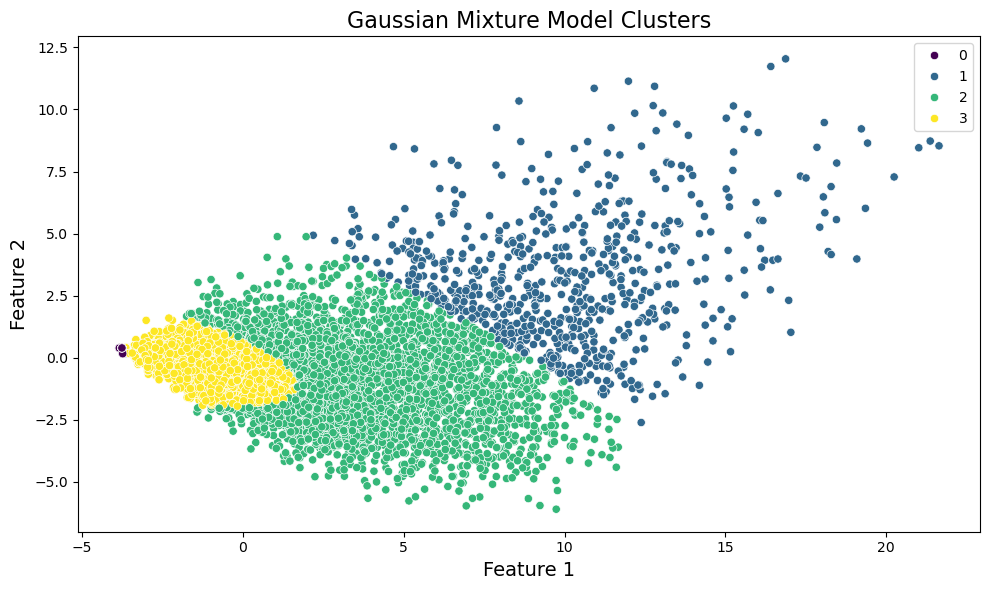

In [77]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gm_labels, palette="viridis", legend="full")

# # Add titles and labels
plt.title("Gaussian Mixture Model Clusters", fontsize=16)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)

plt.tight_layout()
save_fig("gaussian_mixtures_model_4_clusters")
plt.show()

/var/folders/l3/04463r3x53g06h8d9qdk69400000gn/T/ipykernel_96441/1185102420.py:21: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
/var/folders/l3/04463r3x53g06h8d9qdk69400000gn/T/ipykernel_96441/1185102420.py:24: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


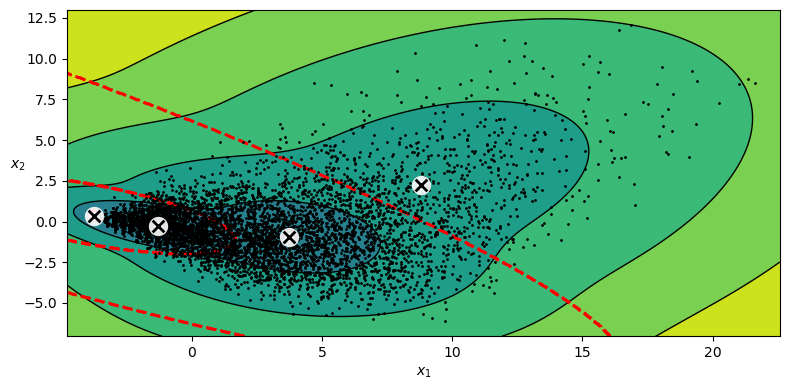

In [79]:
from matplotlib.colors import LogNorm

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)
    
def plot_gaussian_mixture(clusterer, X_pca, resolution=500, show_ylabels=True):
    mins = X_pca.min(axis=0) - 0.95
    maxs = X_pca.max(axis=0) + 0.95
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X_pca[:, 0], X_pca[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X_pca)

save_fig("gaussian_mixtures_plot")
plt.show()

In [81]:
gm.bic(X_pca)

42916.72417301508

In [83]:
gm.aic(X_pca)

42750.412851886635

In [85]:
#the same - BIC/AIC with number of parameters
n_clusters = 4
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X_pca) * len(X_pca) # log(L^)
bic = np.log(len(X_pca)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 42916.72417301508
aic = 42750.412851886635
n_params = 23


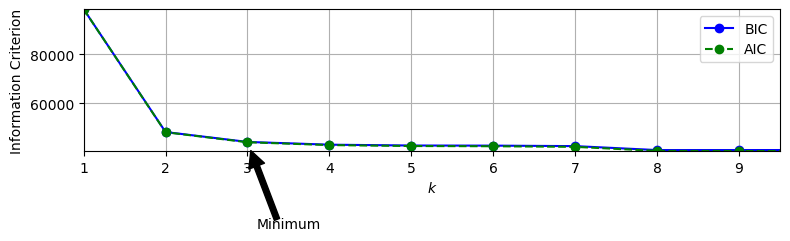

In [134]:
# to generate and saves Figure 2

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X_pca)
             for k in range(1, 11)]
bics = [model.bic(X_pca) for model in gms_per_k]
aics = [model.aic(X_pca) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("Information Criterion")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.annotate("", xy=(3, bics[2]), xytext=(3.4, 8650),
             arrowprops=dict(facecolor='black', shrink=0.1))
plt.text(3.5, 8660, "Minimum", horizontalalignment="center")
plt.legend()
plt.grid()
save_fig("aic_bic_vs_k_plot_")
plt.show()

In [126]:
data_for_clustering.head()

,Q3_1_TEXT_standardized_Android,Q3_1_TEXT_standardized_Other,Q3_1_TEXT_standardized_iOS,Q4,Q5,Q6,Q7_1,Q7_2,Q7_3,Q7_4,...,Q15_13,Q15_14,Q15_15,Q15_16,Q15_17,Q15_18,Q15_19,Q15_20,Q15_21,Q15_22
1,False,True,False,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,False,True,1,4,4,0,1,1,1,...,0,1,0,0,1,1,0,0,0,1
3,False,False,True,1,7,3,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,False,True,False,3,2,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
5,False,False,True,1,5,2,0,1,1,0,...,0,1,0,1,0,0,1,0,1,0


In [138]:
def analyze_clusters_in_original_space(data_scaled, data_cleaned, pca_model, gm_model):
    """
    Analyzes the clusters identified by a Gaussian Mixture model in the original feature space.
    Parameters:
        data_original (np.ndarray): The original dataset with all features (e.g., 77 features).
        pca_model: The fitted PCA model used to reduce dimensionality.
        gm_model: The fitted Gaussian Mixture model used for clustering in the PCA space.
    Returns:
        dict: A dictionary where keys are cluster labels (0, 1, 2, ...) and values
              are NumPy arrays containing the instances in the original feature space
              belonging to each cluster.
    """
    # Step 1: Transform the original data to the PCA space
    data_pca = pca_model.transform(data_scaled)
    # Step 2: Predict cluster labels in the PCA space
    cluster_labels = gm_model.predict(data_pca)
    # Step 3: Map cluster labels back to the original dataset
    clusters_original_space = {i: data_cleaned[cluster_labels == i] for i in range(gm_model.n_components)}
    return clusters_original_space

In [ ]:
# Assuming you have:
# - `data_for_clustering`: Original dataset with 77 features.
# - `pca`: Fitted PCA model (used before GM).
# - `gm`: Fitted Gaussian Mixture model (on PCA-transformed data).
# Analyze clusters in the original space

clusters_in_original_space = analyze_clusters_in_original_space(X_scaled, data_for_clustering, X_pca, gm)
# Example: Access and analyze cluster 0
cluster_0_data = clusters_in_original_space[0]
print(f"Cluster 0 has {len(cluster_0_data)} instances.")
# Analyze each cluster
for cluster_id, instances in clusters_in_original_space.items():
    print(f"Cluster {cluster_id}: {instances.shape[0]} instances.")